<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

계수 :  [-0.05027473]
절편 :  22.58626373626374
270 마력 자동차의 예상 연비 :  9.01 km/l


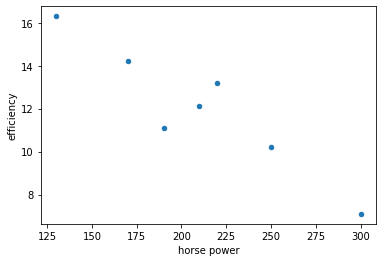

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

name_series = pd.Series(['A','B','C','D','E','F','G'])
horse_power_series = pd.Series([130,250,190,300,210,220,170])
efficiency_series = pd.Series([16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2])

dt = pd.DataFrame({'name':name_series, 'horse power':horse_power_series, 'efficiency': efficiency_series})
x = dt['horse power'].to_numpy()
y = dt['efficiency'].to_numpy()
x = x[:, np.newaxis]

regr = linear_model.LinearRegression()
regr.fit(x,y)

dt.plot(kind = 'scatter', x='horse power', y='efficiency')

#4.1
print("계수 : ", regr.coef_)
print("절편 : ", regr.intercept_)

print("270 마력 자동차의 예상 연비 : ",round(float(regr.predict([[270]])),2),"km/l")


예측 점수 :  0.13834688324673491


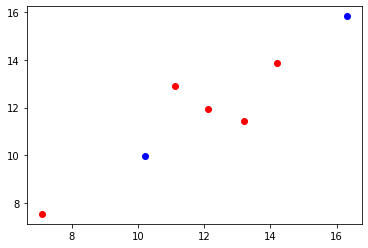

In [ ]:
n_x = normalize(x, axis=0)
nxtrain, nxtest, ytrain, ytest = train_test_split(n_x, y, test_size = 0.2)
regr.fit(nxtrain,ytrain)
yhattrain = regr.predict(nxtrain)
yhattest = regr.predict(nxtest)
plt.scatter(ytrain,yhattrain,color='r')
plt.scatter(ytest,yhattest,color='b')

print("예측 점수 : ", mean_squared_error(ytest, yhattest))

계수 :  [-0.00689189 -0.00731081]
절편 :  30.60405405405405
270 마력 2500kg 자동차의 예상 연비 :  10.47 km/l


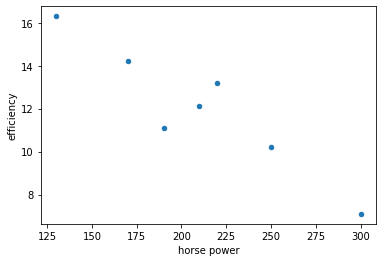

In [ ]:
#4.2
weight_series = pd.Series([1900,2600,2200,2900,2400,2300,2100])
df = pd.DataFrame({'name':name_series, 'horse power':horse_power_series, 'weight':weight_series,'efficiency': efficiency_series})
x = df[['horse power','weight']].to_numpy()
y = df['efficiency'].to_numpy()

regr = linear_model.LinearRegression()
regr.fit(x,y)

dt.plot(kind = 'scatter', x='horse power', y='efficiency')

print("계수 : ", regr.coef_)
print("절편 : ", regr.intercept_)

print("270 마력 2500kg 자동차의 예상 연비 : ",round(float(regr.predict([[270,2500]])),2),"km/l")


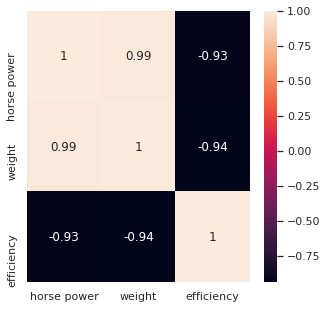

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(5,5)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

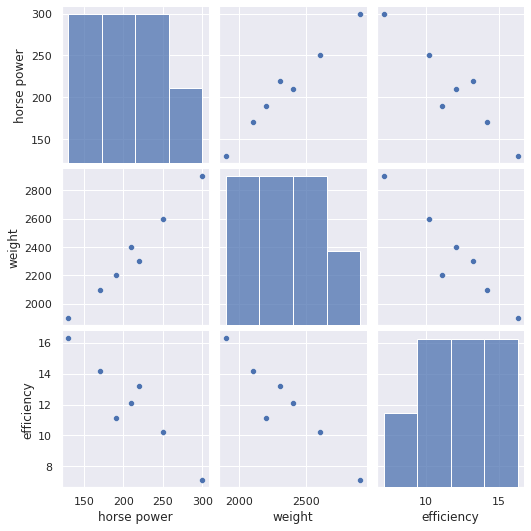

In [ ]:
sns.pairplot(df[['horse power','weight','efficiency']])
plt.show()

예측 점수 :  0.24877757093034


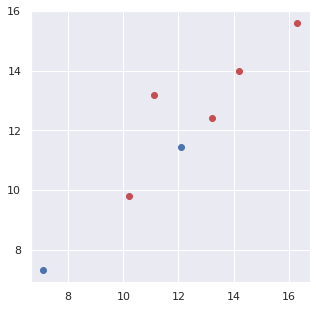

In [ ]:
n_x = normalize(x, axis=0)
nxtrain, nxtest, ytrain, ytest = train_test_split(n_x, y, test_size = 0.2)
regr.fit(nxtrain,ytrain)
yhattrain = regr.predict(nxtrain)
yhattest = regr.predict(nxtest)
plt.scatter(ytrain, yhattrain, color='r')
plt.scatter(ytest, yhattest, color='b')

print("예측 점수 : ", mean_squared_error(ytest, yhattest))